# Numerov Method  
## Radial Schrödinger Equation

We solve the radial Schrödinger equation using the Numerov method,
which leads to a generalized eigenvalue problem
$$
H u = \varepsilon N u,
$$
with fourth-order accuracy in the grid spacing.


In [1]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt


from radial_tools import (
    radial_grid,
    effective_potential,
    normalize_trapezoidal,
    check_normalization
)

from numerov_solver import solve_numerov

The effective radial potential is

$$
W(r) = V(r) + \frac{l(l+1)}{2r^2},
\qquad
V(r) = \frac{1}{2} r^2.
$$


In [2]:
R = 10.0
K = 240
l = 0

energies, u, r = solve_numerov(R, K, l)
dr = r[1] - r[0]

# normalize eigenstates
for n in range(u.shape[1]):
    u[:, n] = normalize_trapezoidal(u[:, n], dr)

print("\nNormalization check:")
for n, E in enumerate(energies):
    norm = check_normalization(u[:, n], dr)
    print(f"  n = {n}, ε = {E:.6f}, ∫|u|²dr = {norm:.12f}")


Numerov Method
l = 0, R = 10.0, K = 240
------------------------------------------------------------
  n = 0, ε = 1.49608327
  n = 1, ε = 3.49413073
  n = 2, ε = 5.49266902
  n = 3, ε = 7.49145206
  n = 4, ε = 9.49038697

Normalization check:
  n = 0, ε = 1.496083, ∫|u|²dr = 1.000000000000
  n = 1, ε = 3.494131, ∫|u|²dr = 1.000000000000
  n = 2, ε = 5.492669, ∫|u|²dr = 1.000000000000
  n = 3, ε = 7.491452, ∫|u|²dr = 1.000000000000
  n = 4, ε = 9.490387, ∫|u|²dr = 1.000000000000


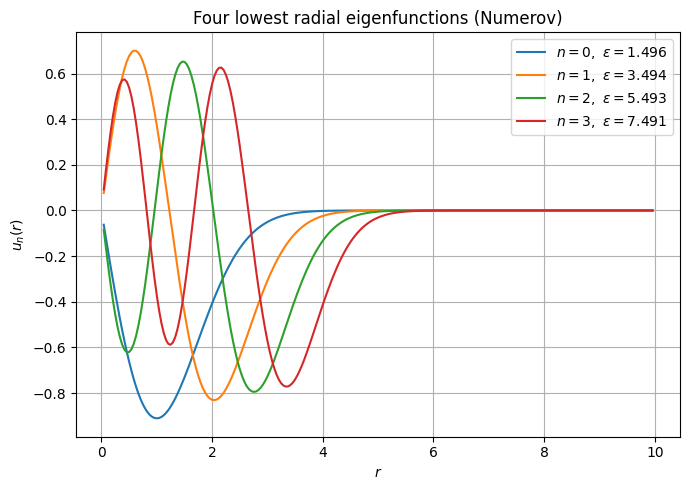

In [3]:
plt.figure(figsize=(7, 5))

for n in range(4):
    plt.plot(r, u[:, n], label=rf"$n={n},\ \varepsilon={energies[n]:.3f}$")

plt.xlabel(r"$r$")
plt.ylabel(r"$u_n(r)$")
plt.title("Four lowest radial eigenfunctions (Numerov)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
